In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#  load iris toy dataset we will use for building these classifiers
from sklearn.datasets import load_iris
data = load_iris()
desc_features = data.feature_names
print(desc_features)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.info()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [3]:
from sklearn.model_selection import train_test_split
X = df[desc_features]
y = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [4]:
X_train.shape, Y_train.shape

((90, 4), (90,))

In [6]:
X_test.shape, Y_test.shape

((60, 4), (60,))

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, Y_train) # training

dt_clf.score(X_test, Y_test) # testing 

0.95

In [10]:
from sklearn.model_selection import cross_val_score

# computing cross-validated metrics
dt_clf = DecisionTreeClassifier()

# simplest way to use CV is to use the cross_val_score function on the estimator and the dataset.
scores = cross_val_score(dt_clf, X, y, cv=5)
print(scores)

print("CV mean accuracy:{:.2f} with a sd:{:.2f}".format(scores.mean(), scores.std()))

[0.96666667 0.96666667 0.9        0.96666667 1.        ]
CV mean accuracy:0.96 with a sd:0.03


In [11]:
from sklearn import metrics

# you can change the scoring function (scoring parameter) as well as the number of folds (cv parameter)
f1_scores = cross_val_score(dt_clf, X, y, cv=10, scoring='f1_macro')
print(f1_scores)

print("10-fold CV\n\tMean F1_macro:{:.2f} with a sd:{:.2f}".format(f1_scores.mean(), f1_scores.std()))

[1.         0.93265993 1.         0.93265993 0.93265993 0.86666667
 0.93265993 0.93265993 1.         1.        ]
10-fold CV
	Mean F1_macro:0.95 with a sd:0.04


In [13]:
# for more control over the CV process 'cross_validate' function can also be used

from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring_funcs = ['precision_macro', 'recall_macro']

scores = cross_validate(dt_clf, X, y, scoring=scoring_funcs)
print(sorted(scores.keys()))

print('Recall scores', scores['test_recall_macro'])
print('Precision scores', scores['test_precision_macro'])

print("CV mean recall:{:.2f} with a sd:{:.2f}".format(scores['test_recall_macro'].mean(), scores['test_recall_macro'].std()))
print("CV mean precision:{:.2f} with a sd:{:.2f}".format(scores['test_precision_macro'].mean(), scores['test_precision_macro'].std()))

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
Recall scores [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Precision scores [0.96969697 0.96969697 0.9023569  0.93333333 1.        ]
CV mean recall:0.95 with a sd:0.03
CV mean precision:0.96 with a sd:0.03


In [14]:
scores = cross_validate(dt_clf, X, y, scoring='accuracy', cv=4, return_estimator=True)
sorted(scores.keys())

['estimator', 'fit_time', 'score_time', 'test_score']

In [16]:
# you can also see the estimators
scores['estimator']

# fold1_est = scores['estimator'][0]
# fold1_est

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# you can also use KFold, which divides all the samples in  groups of samples. 
kf = KFold(n_splits=4, shuffle=True, random_state=7)

#here train and test will be the indices of training and testing sets in each random fold
X_val = X.to_numpy()
y_val = y.to_numpy()
for i, (train, test) in enumerate(kf.split(X)):
#     print("%s %s" % (train, test))
    X_train, X_test, Y_train, Y_test = X_val[train], X_val[test], y_val[train], y_val[test]
    
    nn_clf = KNeighborsClassifier(n_neighbors=3)
    nn_clf.fit(X_train, Y_train)
    
    y_pred = nn_clf.predict(X_test)
    print('Fold {} 3NN accuracy score {:.3f}'.format(i+1, accuracy_score(y_pred, Y_test)) )

Fold 1 3NN accuracy score 0.947
Fold 2 3NN accuracy score 1.000
Fold 3 3NN accuracy score 0.973
Fold 4 3NN accuracy score 0.946


In [20]:
from sklearn.model_selection import LeaveOneOut

# leave one out can also be used as a cv schema, which leaves one sample for testing and n-1 for training. 
loocv = LeaveOneOut()

X_val = X.to_numpy()
y_val = y.to_numpy()

loocv_scores = []

for i, (train, test) in enumerate(loocv.split(X)):
    X_train, X_test, Y_train, Y_test = X_val[train], X_val[test], y_val[train], y_val[test]
    
    nn_clf = KNeighborsClassifier(n_neighbors=3)
    nn_clf.fit(X_train, Y_train)
    
    y_pred = nn_clf.predict(X_test)
    loocv_scores.append(accuracy_score(y_pred, Y_test))

# loocv_scores
print('Mean LOOCV accuracy score for 3NN classifier {:.3f}'.format(np.mean(loocv_scores)) )


Mean LOOCV accuracy score for 3NN classifier 0.960


In [21]:
from sklearn.model_selection import ShuffleSplit

# shuffle split creates repeated random holdout samples
rs = ShuffleSplit(n_splits=10, test_size=.33, random_state=0)
# this instance will create 10 random holdout samples (1/3-2/3)
rs.get_n_splits(X)

rs_scores = []
for i, (train, test) in enumerate(rs.split(X)):
#     print("%s %s" % (train, test))
    X_train, X_test, Y_train, Y_test = X_val[train], X_val[test], y_val[train], y_val[test]
    
    nn_clf = KNeighborsClassifier(n_neighbors=3)
    nn_clf.fit(X_train, Y_train)
    
    y_pred = nn_clf.predict(X_test)
    rs_scores.append(accuracy_score(y_pred, Y_test))
    print('Random holdout {}-- 3NN accuracy score {:.3f}'.format(i+1, accuracy_score(y_pred, Y_test)) )

print('Mean random holdout accuracy score for 3NN classifier {:.3f}'.format(np.mean(rs_scores)) )

Random holdout 1-- 3NN accuracy score 0.960
Random holdout 2-- 3NN accuracy score 0.940
Random holdout 3-- 3NN accuracy score 0.980
Random holdout 4-- 3NN accuracy score 0.920
Random holdout 5-- 3NN accuracy score 0.980
Random holdout 6-- 3NN accuracy score 0.900
Random holdout 7-- 3NN accuracy score 0.980
Random holdout 8-- 3NN accuracy score 1.000
Random holdout 9-- 3NN accuracy score 0.960
Random holdout 10-- 3NN accuracy score 0.960
Mean random holdout accuracy score for 3NN classifier 0.958


In [24]:
# bootstrap sampling using resample
from sklearn.utils import resample
# prepare bootstrap sample

B = 1000 # number of bootstrap samples
N_ = int(df.shape[0] * 0.3) # resample size is 30% of original data 

btsp_scores = []

for i in range(B):
    df_boot_train = resample(df, replace=True, n_samples=N_, random_state=i)
    # print('Bootstrap Sample: %s' % boot)
    X_train = df_boot_train[desc_features]
    Y_train = df_boot_train['target']
#     print(X_train.shape)

    # out of bag observations
    oob_sample = df[~df.index.isin(df_boot_train.index)]
#     # print('OOB Sample: %s' % oob_sample)
    X_test = oob_sample[desc_features]
    Y_test = oob_sample['target']
#     print('\t',X_test.shape)
    
    nn_clf = KNeighborsClassifier(n_neighbors=3)
    nn_clf.fit(X_train, Y_train)
    
    y_pred = nn_clf.predict(X_test)
    btsp_scores.append(accuracy_score(y_pred, Y_test))

print('Mean bootstrap (OOB) accuracy score for 3NN classifier {:.3f}'.format(np.mean(btsp_scores)) )

Mean bootstrap (OOB) accuracy score for 3NN classifier 0.947


/home/baydin2/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


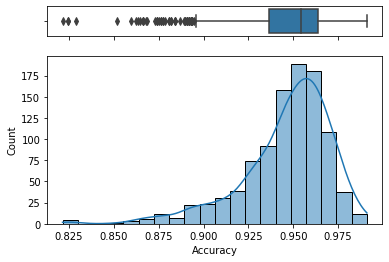

In [26]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(btsp_scores, ax=ax_box)
sns.histplot(btsp_scores, ax=ax_hist, bins=20, kde=True)
 
# Remove x axis name for the boxplot
ax_hist.set(xlabel='Accuracy')
plt.show()